26


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


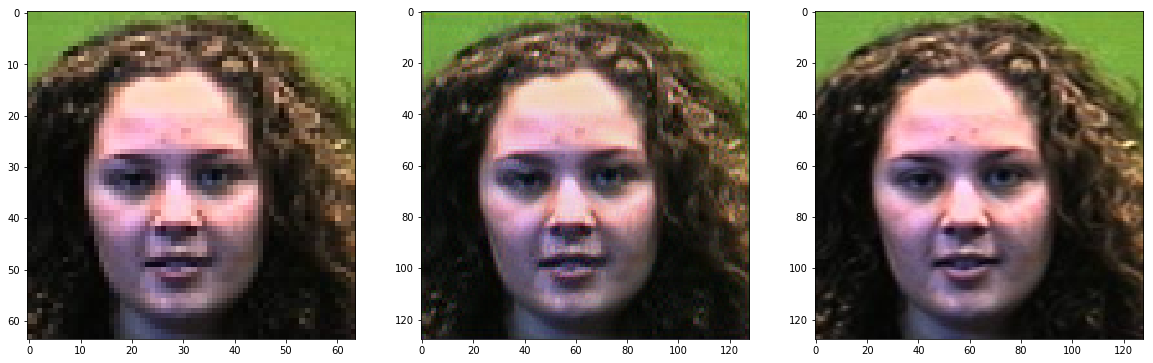

In [27]:
import tensorflow.keras as K
import numpy as np
import cv2
import matplotlib.pyplot as plt, glob, os
input_size=64
val_list = glob.glob('set5/*.*', recursive=True)
print(len(val_list))
def read_image(img_path,scale=2):
    global input_size
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lr = cv2.resize(img, (input_size,input_size),interpolation=cv2.INTER_CUBIC)
    img_hr = cv2.resize(img, (input_size*scale,input_size*scale),interpolation=cv2.INTER_CUBIC)
    return img_lr,img_hr
mo=K.models.load_model('sr_2x.h5' ,custom_objects=None,compile=False)
for i in val_list:
    tlr,hlr=read_image(i)
    tlr=np.expand_dims(tlr,axis=0)
    pred=mo.predict(tlr/255.)
    cv2.imwrite('res/'+i+'.png',pred[0]*255.)
_,axs=plt.subplots(1,3,figsize=(20,20))
ax=axs.flat
ax[0].imshow(tlr[0]/255.)
ax[1].imshow(pred[0])
ax[2].imshow(hlr/255.)